# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
data = pd.read_csv('..\\data\\absences.csv')

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

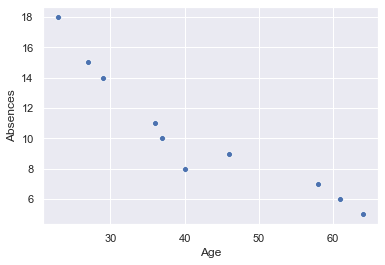

In [2]:
sns.set()
sns.scatterplot(x='Age', y='Absences', data=data)

There seemed to be a tendency to decrease the number of absences the older the employees are.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [3]:
##the parameters inputs are the list for the absences Y, and ages X.
abse = data.Absences.values.tolist()
ages = data.Age.values.tolist()

def slope(x,y):
    numerator = 0
    denominator = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        numerator += ((j-mu_y)*(i-mu_x))
        denominator += (i-mu_x)**2
    m = numerator/denominator
    return m

m = slope(ages,abse)

def intercept(x,y,slope):
    m = slope(x,y)
    mu_x = sum(x)/len(x)
    mu_y = sum(y)/len(y)
    b = mu_y - m*mu_x
    return b

b = intercept(ages,abse,slope)


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [5]:
slo = slope(abse,ages)
int = intercept(abse,ages,slope)

print(f'The regression line is y = {slo}x + {int}')

The regression line is y = -3.2435977514053715x + 75.50905683947533


The regression line shows that there is a negative slope starting from an intercept of 35.25. This initially means that the more the age, the less absences seems to happen.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [92]:
def cov(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    values = [(x[i] - x_mean) * (y[i] - y_mean)
            for i in range(len(x))]
    covariance = sum(values) / (len(values) - 1)
    return covariance

def corr(x, y):
    correlation = cov(x, y) / (np.std(x) * np.std(y))
    return correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [94]:
#cova = cov(data.Age[0],data.Absences[0],data.Age[3],data.Absences[3])
#corre = corr(data.Age[0],data.Absences[0],data.Age[3],data.Absences[3])

print('Covariance',cov(data.Age,data.Absences))
print('Correlation',corr(data.Age,data.Absences))


Covariance -57.699999999999996
Correlation -1.0361593436090013


In [ ]:
# your comments here

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

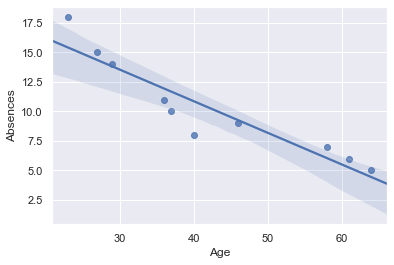

In [95]:
sns.regplot(x='Age', y='Absences', data=data)
# The tendency is negative so we can consider that the age is an indicator of absenteeism.
# The less the age, the more absences are expected.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [96]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [97]:
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [98]:
ironbeers_df.corr()
#There is a very strong correlation between the number of people told and the number of people
#that stayed. So it seems I am actually the reason why people stay!

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

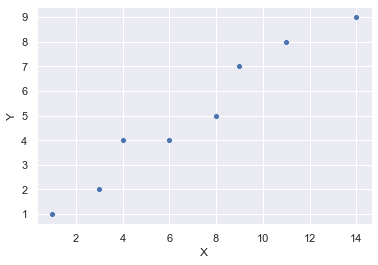

In [100]:
sns.scatterplot(x='X', y='Y', data=ironbeers_df)

There is a strong positive relation between both variables which seem to indicate that the more people are told to stay, the more they actually stay.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [109]:
X = ironbeers_df['X']
Y = ironbeers_df['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print (f'The slope is {slope}')
print (f'The intercept is {intercept}')
print(f'The linear regression is y = {slope}x + {intercept}')

The slope is 0.6363636363636364
The intercept is 0.5454545454545459
The linear regression is y = 0.6363636363636364x + 0.5454545454545459


The slope is positive in a level that if I ask a person to stay, '0,63' people will make it to stay. The intercept explains that without me asking to anyone, already 0,54 of a person confirmed that would stay.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

I am obviously not the reason why people do not stay on Fridays. It is likely that I related any other variable (for example, weather) that affects on people's mood and wrongly related to me asking people to stay. After this analysis, I am convinced I should ask Ironhack commission for being a very efficient PR.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here